In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [55]:
from preprocess import load_graph

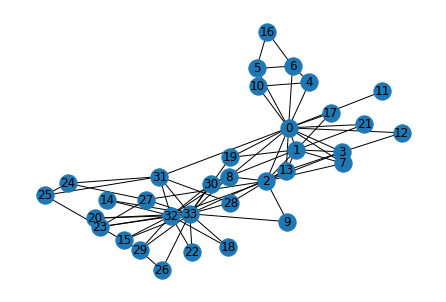

In [56]:
G = load_graph('karate')
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [57]:
# trying to implement some link reconstruction
n = G.number_of_nodes()
m = G.number_of_edges()
print(f'Number of nodes is {n}')
print(f'Number of edges is {m}')
print(f'Number of connected components are {nx.number_connected_components(G)}')

Number of nodes is 34
Number of edges is 78
Number of connected components are 1


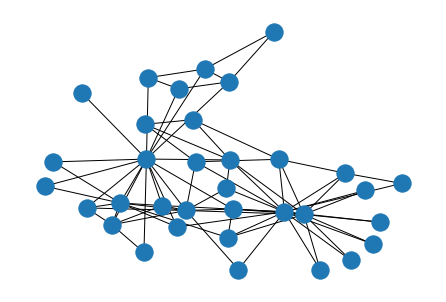

In [58]:
#plt.figure(figsize=(12,8))
nx.draw(G)

In [59]:
import random

/var/folders/2z/df_bhzjn08x5hgt6tpbr1w4c0000gn/T/ipykernel_3527/608944278.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(G.edges(), int(0.1 * G.number_of_edges()))


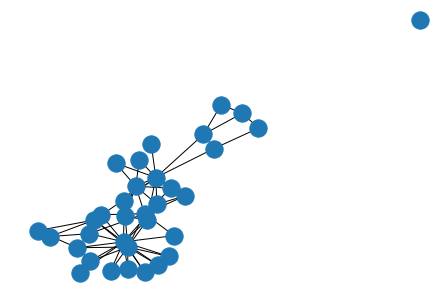

In [60]:
# take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.1 * G.number_of_edges()))
# remove edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)
nx.draw(G_train)

In [61]:
edge_subset_size = len(list(edge_subset))
print(f'Deleted: {edge_subset_size}')
print(f'Remaining: {m-edge_subset_size}')

Deleted: 7
Remaining: 71


In [62]:
# jaccard_coeffecient
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
score[0:4]

(0.3125, 0.07692307692307693, 0.07142857142857142, 0.0)

In [63]:
label[0:4]

(True, True, True, False)

In [64]:
prediction_jaccard[:4]

[(0, 2, 0.3125),
 (0, 4, 0.07692307692307693),
 (0, 6, 0.07142857142857142),
 (0, 9, 0.0)]

In [65]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])
prediction_adamic[0:6]

[(0, 2, 3.166263256971175),
 (0, 4, 0.9102392266268373),
 (0, 6, 0.7213475204444817),
 (0, 9, 0),
 (0, 11, 0),
 (0, 14, 0)]

In [66]:
score[0:6]

(3.166263256971175, 0.9102392266268373, 0.7213475204444817, 0, 0, 0)

In [67]:
label[0:6]

(True, True, True, False, True, False)

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
fpr_adamic, tpr_adamic, _ =  roc_curve(label, score)
auc_adamic = roc_auc_score(label, score)
auc_adamic

0.8111505471753918

In [70]:
fpr_adamic

array([0.        , 0.00207039, 0.00207039, 0.00414079, 0.00414079,
       0.01656315, 0.02070393, 0.03933747, 0.04554865, 0.05175983,
       0.05590062, 0.05590062, 0.05797101, 0.06004141, 0.07660455,
       0.08074534, 0.10351967, 0.17805383, 0.18426501, 0.1884058 ,
       0.20082816, 0.2173913 , 0.24016563, 0.34782609, 0.45134576,
       1.        ])

In [71]:
tpr_adamic

array([0.        , 0.        , 0.14285714, 0.14285714, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.42857143, 0.42857143, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.71428571, 0.71428571,
       0.71428571, 0.71428571, 0.71428571, 0.85714286, 0.85714286,
       1.        ])

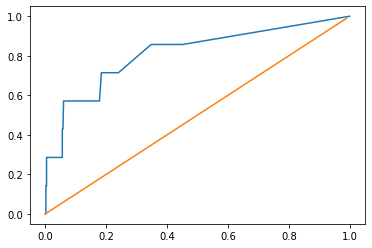

In [72]:
plt.plot(fpr_adamic, tpr_adamic, label='adamic')
plt.plot(np.arange(0.0, 1.0, 0.01), np.arange(0.0, 1.0, 0.01), label='baseline')

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("data/Connectome_matrix.csv", index_col=0)
df

,6743,7501,10536,11135,11731,12115,13459,14162,15519,16668,...,2017535,2019137,2028656,2028720,2029381,2185709,2233438,2233700,2242135,2242572
6743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10536,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2233438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2233700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
n = df.to_numpy(dtype=np.integer)

In [76]:
G2 =nx.convert_matrix.from_numpy_array(n)

In [77]:
print(G2.number_of_edges())
print(G2.number_of_nodes())

10822
2728
